In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ml_help
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time
sns.set_theme()

# Load data

In [2]:
df = pd.read_csv("./data/yonge_count_weather_incidents.csv.zip")
df

,total_count,dist_from_mid_point,is_north_from_mid_point,hour,minute,magnitudeOfDelay,length,delay,visibility,temperature,...,day_of_week_3,day_of_week_5,event_description_Backed up traffic,event_description_Demonstration,event_description_No incidents,event_description_Obstruction on the road,event_description_Roadworks,event_description_Slow traffic,event_description_Stopped traffic,event_description_Two lanes closed
0,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,0.69,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,-2.94,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,4.29,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,0.66,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,-3.03,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.89,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20119,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,25.28,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20120,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.88,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20121,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,27.84,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = df.drop("total_count",axis=1)
y = df["total_count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
metrics = pd.read_csv("./metrics/154_best_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.968405,17.813783,588.482108,24.258650,0.056547,1.985810,0.015672
1,Random Forest,0.948466,23.870524,959.863473,30.981663,0.079623,7.494126,0.073057
2,Decision Tree,0.936537,25.829204,1182.043317,34.380857,0.084556,0.050637,0.001992
3,MLP,0.731987,53.011612,4991.948094,70.653720,0.171965,79.689525,0.004629


# Load models

## XGBoost

### Run CV

In [5]:
import xgboost as xgb

params = ml_help.params_to_dict("153_xgboost")

In [6]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

xgb_cv_metrics = ml_help.run_stratified_kfold("XGBoost",xgboost_pipeline,X_train,y_train)
xgb_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 2.039191961288452 seconds to fit!
Running fold 1...
Fold 1 took 1.7203726768493652 seconds to fit!
Running fold 2...
Fold 2 took 1.7210590839385986 seconds to fit!
Running fold 3...
Fold 3 took 1.7370121479034424 seconds to fit!
Running fold 4...
Fold 4 took 1.7693605422973633 seconds to fit!
Running fold 5...
Fold 5 took 1.741870403289795 seconds to fit!
Running fold 6...
Fold 6 took 1.7503018379211426 seconds to fit!
Running fold 7...
Fold 7 took 1.7414257526397705 seconds to fit!
Running fold 8...
Fold 8 took 1.7647285461425781 seconds to fit!
Running fold 9...
Fold 9 took 1.7396106719970703 seconds to fit!


{'model': 'XGBoost',
 'r2': 0.9680284587088943,
 'mae': 16.53464012393433,
 'mape': 0.05271351246038898,
 'mse': 570.478381217621,
 'rmse': 23.78154232923091,
 'time_to_fit': 1.7724933624267578}

### Test using previously unseen data

In [7]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

start = time()
pipe = xgboost_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

xgb_metrics = ml_help.get_metrics_reg("XGBoost",y_test,y_pred)
xgb_metrics["time_to_fit"] = end-start
xgb_metrics

{'model': 'XGBoost',
 'r2': 0.9715481140715082,
 'mae': 15.994276786472486,
 'mse': 506.18787762826605,
 'rmse': 22.49861946049726,
 'mape': 0.05118002005395786,
 'time_to_fit': 1.786846399307251}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


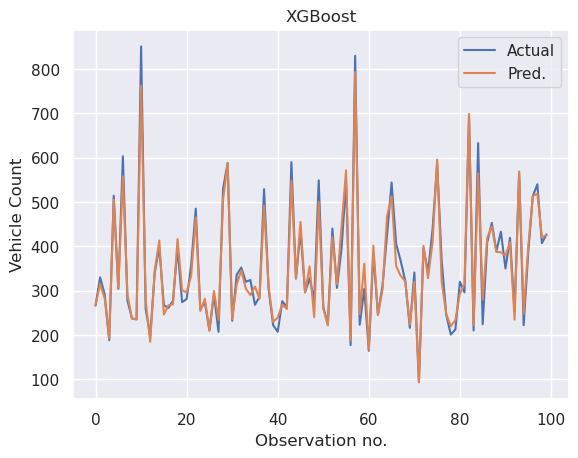

In [8]:
ml_help.plot_prediction(y_test, y_pred, "XGBoost", "Vehicle Count", "155_xgboost_predictions")

## Random Forest

### Run CV

In [9]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("153_random_forest")

In [10]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params,n_jobs=-1))

random_forest_cv_metrics = ml_help.run_stratified_kfold("Random Forest",random_forest_pipeline,X_train,y_train)
random_forest_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 1.1311440467834473 seconds to fit!
Running fold 1...
Fold 1 took 1.1179187297821045 seconds to fit!
Running fold 2...
Fold 2 took 1.1383543014526367 seconds to fit!
Running fold 3...
Fold 3 took 1.116945743560791 seconds to fit!
Running fold 4...
Fold 4 took 1.116525650024414 seconds to fit!
Running fold 5...
Fold 5 took 1.1343646049499512 seconds to fit!
Running fold 6...
Fold 6 took 1.1297571659088135 seconds to fit!
Running fold 7...
Fold 7 took 1.1415627002716064 seconds to fit!
Running fold 8...
Fold 8 took 1.1426241397857666 seconds to fit!
Running fold 9...
Fold 9 took 1.122901201248169 seconds to fit!


{'model': 'Random Forest',
 'r2': 0.9417269695314217,
 'mae': 24.119218594637623,
 'mape': 0.07938897643336915,
 'mse': 1039.2731901593193,
 'rmse': 32.21289376220012,
 'time_to_fit': 1.12920982837677}

### Test using previously unseen data

In [11]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

start = time()
pipe = random_forest_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

random_forest_metrics = ml_help.get_metrics_reg("Random Forest",y_test,y_pred)
random_forest_metrics["time_to_fit"] = end-start
random_forest_metrics

{'model': 'Random Forest',
 'r2': 0.9436575559022622,
 'mae': 23.983093919883835,
 'mse': 1002.3891656919413,
 'rmse': 31.66053009177107,
 'mape': 0.07956948651084288,
 'time_to_fit': 9.67871356010437}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


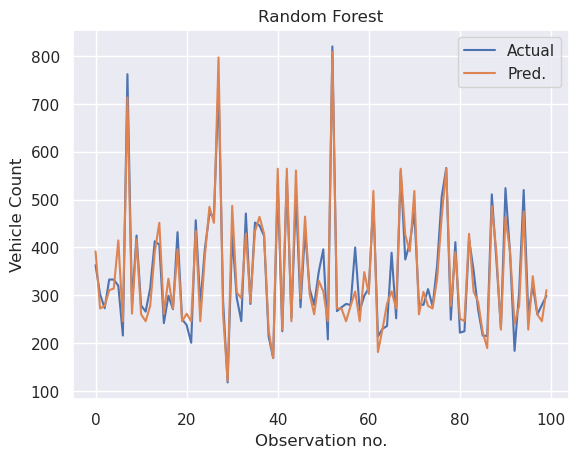

In [12]:
ml_help.plot_prediction(y_test, y_pred, "Random Forest", "Vehicle Count", "155_random_forest_predictions")

## Decision Tree

### Run CV

In [13]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("153_decision_tree")

In [14]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

dtr_cv_metrics = ml_help.run_stratified_kfold("Decision Tree",decision_tree_pipeline,X_train,y_train)
dtr_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 0.04961800575256348 seconds to fit!
Running fold 1...
Fold 1 took 0.049361228942871094 seconds to fit!
Running fold 2...
Fold 2 took 0.04941582679748535 seconds to fit!
Running fold 3...
Fold 3 took 0.04930520057678223 seconds to fit!
Running fold 4...
Fold 4 took 0.04956674575805664 seconds to fit!
Running fold 5...
Fold 5 took 0.04968142509460449 seconds to fit!
Running fold 6...
Fold 6 took 0.050002336502075195 seconds to fit!
Running fold 7...
Fold 7 took 0.050299882888793945 seconds to fit!
Running fold 8...
Fold 8 took 0.04945182800292969 seconds to fit!
Running fold 9...
Fold 9 took 0.04983806610107422 seconds to fit!


{'model': 'Decision Tree',
 'r2': 0.9365531332824695,
 'mae': 25.04840053805557,
 'mape': 0.08215160143140772,
 'mse': 1131.676496463807,
 'rmse': 33.598213471183186,
 'time_to_fit': 0.049654054641723636}

### Test using previously unseen data

In [15]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

start = time()
pipe = decision_tree_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

dtr_metrics = ml_help.get_metrics_reg("Decision Tree",y_test,y_pred)
dtr_metrics["time_to_fit"] = end-start
dtr_metrics

{'model': 'Decision Tree',
 'r2': 0.9399481134288599,
 'mae': 24.924948455240845,
 'mse': 1068.3839056369436,
 'rmse': 32.68614240984922,
 'mape': 0.08250405372930858,
 'time_to_fit': 0.06002163887023926}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


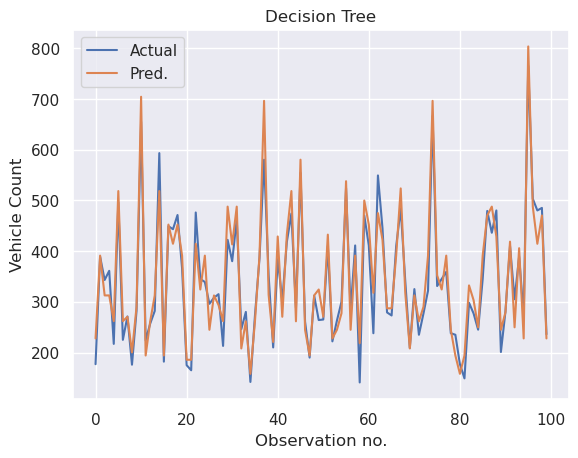

In [16]:
ml_help.plot_prediction(y_test, y_pred, "Decision Tree", "Vehicle Count", "155_decision_tree_predictions")

## MLP

### Run CV

In [17]:
from sklearn.neural_network import MLPRegressor

params = ml_help.params_to_dict("153_mlpr")

In [18]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

mlp_cv_metrics = ml_help.run_stratified_kfold("MLP",mlp_pipeline,X_train,y_train)
mlp_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 0 took 95.89936327934265 seconds to fit!
Running fold 1...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1 took 95.08770489692688 seconds to fit!
Running fold 2...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 took 96.21837162971497 seconds to fit!
Running fold 3...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3 took 95.52504873275757 seconds to fit!
Running fold 4...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4 took 95.54135656356812 seconds to fit!
Running fold 5...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5 took 94.77520108222961 seconds to fit!
Running fold 6...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 6 took 95.22958159446716 seconds to fit!
Running fold 7...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 7 took 94.75588655471802 seconds to fit!
Running fold 8...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 8 took 93.3151330947876 seconds to fit!
Running fold 9...
Fold 9 took 92.38190698623657 seconds to fit!


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'model': 'MLP',
 'r2': 0.7347875088263589,
 'mae': 50.553022043061105,
 'mape': 0.16448495745197467,
 'mse': 4730.158486211081,
 'rmse': 68.76325215065418,
 'time_to_fit': 94.87295544147491}

### Test using previously unseen data

In [19]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

start = time()
pipe = mlp_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

mlp_metrics = ml_help.get_metrics_reg("MLP",y_test,y_pred)
mlp_metrics["time_to_fit"] = end-start
mlp_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'model': 'MLP',
 'r2': 0.7525642172934044,
 'mae': 49.17550327723328,
 'mse': 4402.133272020325,
 'rmse': 66.3485740014081,
 'mape': 0.15970690110187058,
 'time_to_fit': 104.32882618904114}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


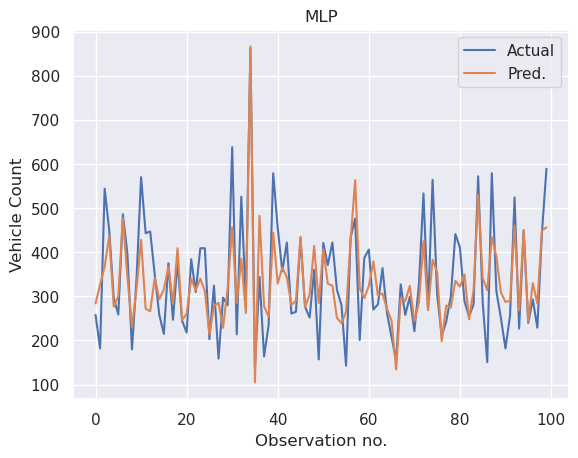

In [20]:
ml_help.plot_prediction(y_test, y_pred, "MLP", "Vehicle Count", "155_mlp_predictions")

# Store metrics

In [21]:
metrics_cv = pd.concat([pd.DataFrame(xgb_cv_metrics,index=[0]),pd.DataFrame(random_forest_cv_metrics,index=[0]),pd.DataFrame(dtr_cv_metrics,index=[0]),pd.DataFrame(mlp_cv_metrics,index=[0])])
metrics_cv.to_csv("./metrics/155_yonge_count_weather_incidents_cv_metrics.csv.zip",index=False,compression="zip")

metrics = pd.concat([pd.DataFrame(xgb_metrics,index=[0]),pd.DataFrame(random_forest_metrics,index=[0]),pd.DataFrame(dtr_metrics,index=[0]),pd.DataFrame(mlp_metrics,index=[0])])
metrics.to_csv("./metrics/155_yonge_count_weather_incidents_metrics.csv.zip",index=False,compression="zip")

# Read metrics

In [2]:
metrics_cv = pd.read_csv("./metrics/155_yonge_count_weather_incidents_cv_metrics.csv.zip")
metrics = pd.read_csv("./metrics/155_yonge_count_weather_incidents_metrics.csv.zip")

# Print CV metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


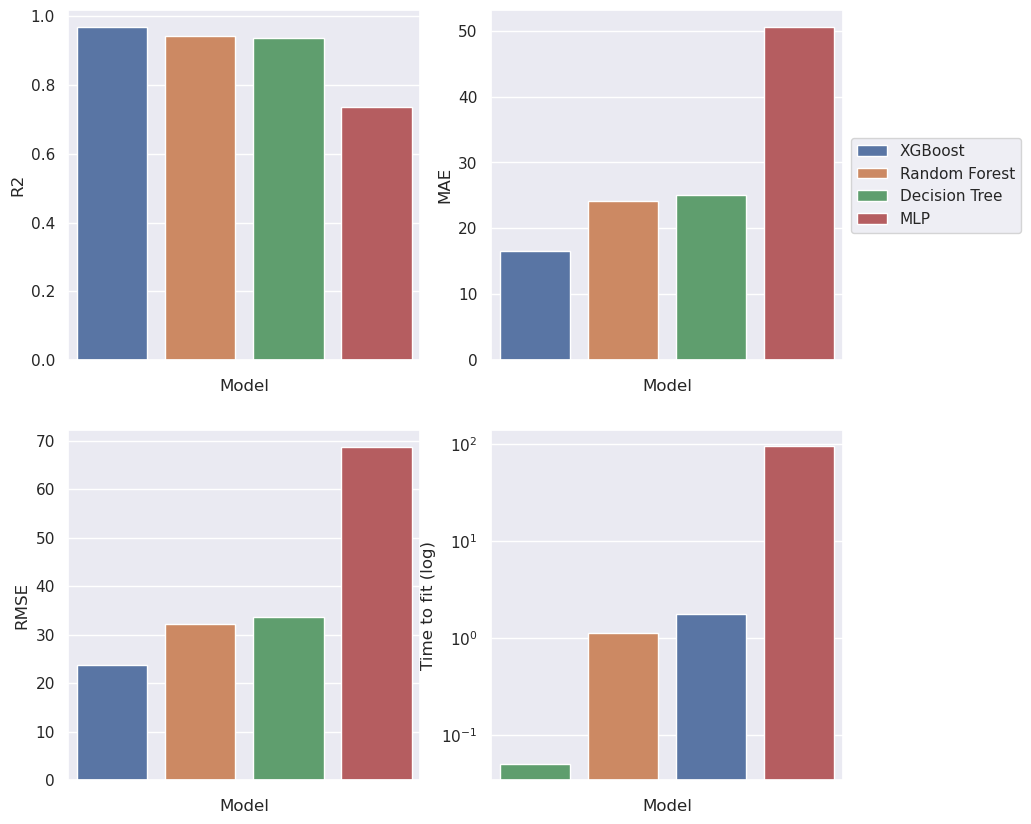

In [5]:
metrics_cv.sort_values(by="r2", inplace=True, ascending=False)
metrics.sort_values(by="r2", inplace=True, ascending=False)
ttf_order_cv = list(metrics_cv.sort_values(by="time_to_fit")["model"])
ttf_order = list(metrics.sort_values(by="time_to_fit")["model"])

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(ax=axes[0, 0], data=metrics_cv, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics_cv, x='model', y='mae',hue="model",dodge=False)
# sns.barplot(ax=axes[0, 2], data=metrics_cv, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics_cv, x='model', y='rmse',hue="model",dodge=False)
# sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='time_to_fit',hue="model",dodge=False, order=ttf_order_cv)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# axes[0, 2].set(xlabel="Model",xticklabels=[])
# axes[0, 2].set(ylabel="MSE")
# axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

# axes[1, 1].set(xlabel="Model",xticklabels=[])
# axes[1, 1].set(ylabel="MAPE")
# axes[1, 1].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 1].get_legend().remove()

plt.savefig("./plots/155_yonge_count_weather_incidents_cv_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/155_yonge_count_weather_incidents_cv_metrics.png",bbox_inches="tight")
plt.savefig("./plots/155_yonge_count_weather_incidents_cv_metrics.pdf",bbox_inches="tight")

# Print metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


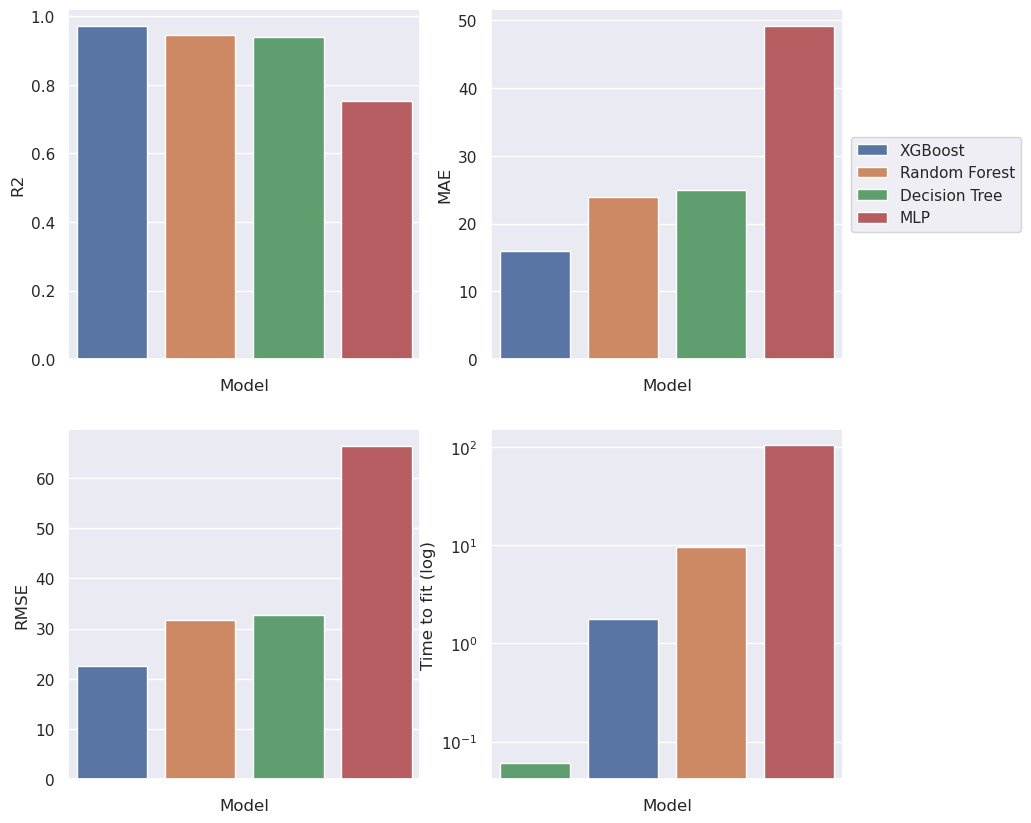

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
# sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
# sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False, order=ttf_order)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5Model))

# axes[0, 2].set(xlabel="Model",xticklabels=[])
# axes[0, 2].set(ylabel="MSE")
# axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

# axes[1, 1].set(xlabel="Model",xticklabels=[])
# axes[1, 1].set(ylabel="MAPE")
# axes[1, 1].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 1].get_legend().remove()

plt.savefig("./plots/155_yonge_count_weather_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/155_yonge_count_weather_incidents_metrics.png",bbox_inches="tight")
plt.savefig("./plots/155_yonge_count_weather_incidents_metrics.pdf",bbox_inches="tight")